### Implementing K-Means to find different clusters within the dataset based on same status_type

### Import Libraries
#### Link for preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Import dataset
#### Dataset link: https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand
#### Dataset is available on kaggle: https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo/data

In [2]:
df=pd.read_csv("Live.csv")

### Exploring dataset

In [3]:
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.shape #checking shape of dataset

(7050, 16)

In [5]:
df.info() #printing information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
df.isnull().sum() #checking how many null values are there in each columns

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
# There are three categorical columns. Exploring them one by one
print(len(df["status_id"].unique()))
print(len(df["status_type"].unique()))
print(len(df["status_published"].unique()))

print(df["status_id"].unique())
print(df["status_type"].unique())
print(df["status_published"].unique()) #kind of date and time column

6997
4
6913
['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528']
['video' 'photo' 'link' 'status']
['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']


### Data Cleaning

In [8]:
# Removing the last four columns as they  contain null values
# Removing the status published and status id columns

#In either two ways you can drop columns
#df.drop(["Column1","Column2","Column3","Column4"],axis=1,inplace=True) 
df.drop(columns=["Column1","Column2","Column3","Column4","status_id","status_published"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [9]:
df.head(100)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,photo,23,7,0,20,3,0,0,0,0
96,photo,266,25,0,250,11,5,0,0,0
97,video,378,512,30,348,27,2,0,0,1
98,video,421,709,30,373,45,2,0,1,0


### Data preprocessing steps


#### Step 1: Convert status_type categorical column into numerical column.
#### Label Encoding:Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.
#### GfG link: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
#### Sklearn link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [10]:
data=df.copy()
le=LabelEncoder()

data['status_type'] = le.fit_transform(data['status_type']) #fit_transform fits label encoder and returns encoded labels
data.info()

y=data['status_type'] #true labels
print(df["status_type"].unique())
print(data["status_type"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB
['video' 'photo' 'link' 'status']
[3 1 0 2]


In [11]:
data.head(100)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,1,23,7,0,20,3,0,0,0,0
96,1,266,25,0,250,11,5,0,0,0
97,3,378,512,30,348,27,2,0,0,1
98,3,421,709,30,373,45,2,0,1,0


#### Step 2: Feature scaling

In [12]:
cols=data.columns
rs=MinMaxScaler()
data=rs.fit_transform(data)
data

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 3.60934183e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [13]:
data=pd.DataFrame(data,columns=[cols]) #converting array to dataframe
#print(data["status_type"].unique())
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


### Fitting K-Means model with two clusters

In [14]:
kmeans=KMeans(n_clusters=2,n_init="auto",random_state=1)
kmeans.fit(data)

KMeans(n_clusters=2, n_init='auto', random_state=1)

### KMeans Inertia

#### Link:https://medium.com/@matthew.dicicco38/inertia-for-ml-applications-8c38de2d10d7
#### Link:https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet

#### Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

#### A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

In [15]:
kmeans.inertia_

240.06686397262814

In [16]:
kmeans.cluster_centers_

array([[9.86305122e-01, 6.92406932e-02, 2.95016448e-02, 3.24726998e-02,
        6.09613107e-02, 5.20380355e-02, 8.94403623e-03, 1.06165835e-02,
        7.97525255e-03, 7.88559917e-03],
       [3.47920277e-01, 3.81089775e-02, 7.68718371e-04, 7.29570753e-04,
        3.75866551e-02, 2.15022066e-03, 2.36743015e-03, 1.17701928e-03,
        3.09239814e-03, 1.41862805e-03]])

In [17]:
pred_labels=kmeans.labels_
correct_predicted_labels=sum(y==pred_labels)

In [18]:
print("Accuracy",correct_predicted_labels/y.size)

Accuracy 0.6082269503546099


### Elbow method to calculate optimal value of K i.e clusters

#### To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow.

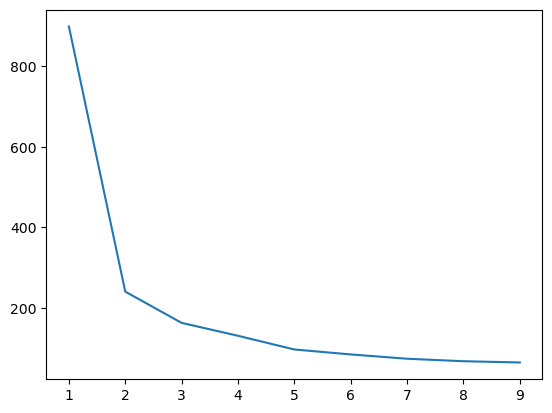

In [19]:
inertia=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,n_init="auto",random_state=1)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10),inertia)

### Calculate accuracy for K=5 and K=6 clusters

In [20]:
kmeans=KMeans(n_clusters=5,n_init="auto",random_state=1)
kmeans.fit(data)
pred_labels=kmeans.labels_
correct_predicted_labels=sum(y==pred_labels)

print("Accuracy",correct_predicted_labels/y.size)
print(kmeans.inertia_)

Accuracy 0.5831205673758866
96.25019359603317


In [21]:
kmeans=KMeans(n_clusters=6,n_init="auto",random_state=1)
kmeans.fit(data)
pred_labels=kmeans.labels_
correct_predicted_labels=sum(y==pred_labels)

print("Accuracy",correct_predicted_labels/y.size)
print(kmeans.inertia_)

Accuracy 0.5831205673758866
83.9364746925007


In [22]:
kmeans=KMeans(n_clusters=3,n_init="auto",random_state=1)
kmeans.fit(data)
pred_labels=kmeans.labels_
correct_predicted_labels=sum(y==pred_labels)

print("Accuracy",correct_predicted_labels/y.size)
print(kmeans.inertia_)

Accuracy 0.591063829787234
162.3851167026438


### Silhouette Score
#### Link:https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
#### Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
#### Note: 
- The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- The Silhouette Coefficient is defined for each sample and is composed of two scores:

  - a: The mean distance between a sample and all other points in the same class.

  - b: The mean distance between a sample and all other points in the next nearest cluster.

In [23]:
kmeans=KMeans(n_clusters=6,n_init="auto",random_state=1)
kmeans.fit(data)
pred_labels=kmeans.labels_
silhouette_score(data, pred_labels, metric='euclidean')

0.7718739365197886

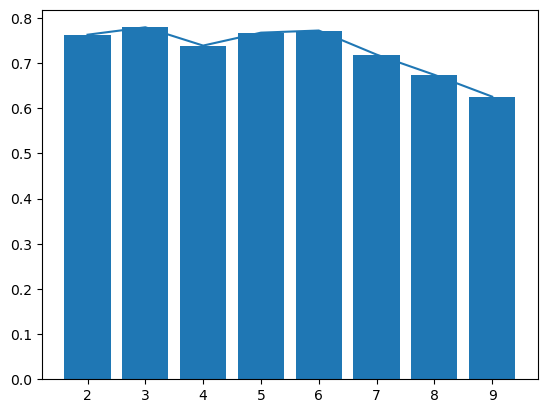

In [24]:
score=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init="auto",random_state=1)
    kmeans.fit(data)
    pred_labels=kmeans.labels_
    score.append(silhouette_score(data, pred_labels, metric='euclidean'))
plt.bar(range(2,10),score)
plt.plot(range(2,10),score)

In [25]:
score

[0.7625904132694745,
 0.7790520443507928,
 0.73852091633004,
 0.7671433309817643,
 0.7718739365197886,
 0.7185950947149877,
 0.6738388778018386,
 0.6255387657820136]

### Conclusion
- On observing the silhouette scores for different k values, it can be noted that silhouette score is highest for k=3 and next highest is for k=6. So these two configuration of clusters will fit our data very well.
- Also looking at the inertia values the least inertia value is for k=6. After k=6 the change in inertia value slows down.
- So k=6 can be said to be optimal number of clusters for this dataset with accuracy of prediction close to 60%.

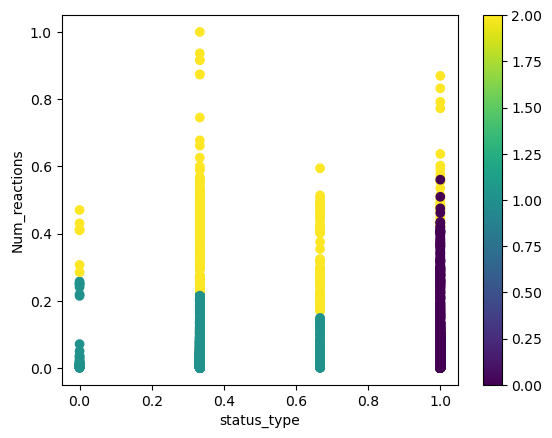

In [27]:
kmeans=KMeans(n_clusters=3,n_init="auto",random_state=1)
kmeans.fit(data)
plt.scatter(data["status_type"],data["num_reactions"],c=kmeans.labels_,cmap='viridis')
plt.ylabel("Num_reactions")
plt.xlabel("status_type")
plt.colorbar()
plt.show()
